In [2]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from io import BytesIO
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [5]:
#CARGAS = pd.read_excel("20191126 Cargas en Sell Out.xlsx","Sheet1")
#CARGAS
file="jumex_base.xls"
xl= pd.ExcelFile(file)
sheetnames=xl.sheet_names
file=[pd.read_excel(file, sheet_names=s) for s in sheetnames]

#for k in range(len(sheetnames)):
cargas=pd.DataFrame(file[0])    
cargas

,NOMBRE,PERFIL,ACTIVIDAD,PARTICIPACIONES,PUNTOS,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Jesus Miguel Mendívil Apodaca,Jumex,Jumex,1,0,NaN,NaN,NaN,NaN,1.0,0.0
1,༒Mคא༒,Jumex,Jumex,1,0,NaN,NaN,NaN,NaN,1.0,0.0
2,1 1,Jumex,Jumex,1,0,NaN,NaN,NaN,NaN,1.0,0.0
3,Aaron Paniagua,Jumex,Jumex,1,10,NaN,NaN,NaN,NaN,1.0,10.0
4,Aaron Caballero,Jumex,Jumex,1,200,NaN,NaN,NaN,NaN,1.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...
3670,Zuñiga Frida,Jumex,Jumex,1,10,NaN,NaN,NaN,NaN,NaN,NaN
3671,Zuñiga Saul,Jumex,Jumex,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3672,Zyan Morales,Jumex,Jumex,1,10,NaN,NaN,NaN,NaN,NaN,NaN
3673,Артуро Бальбуэна,Jumex,Jumex,1,200,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cargas.describe()

,PARTICIPACIONES,PUNTOS,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,3675.000000,3.675000e+03,0.0,0.0,0.0,0.0,3212.000000,3211.000000
mean,1.562721,5.468519e+03,NaN,NaN,NaN,NaN,0.999689,1970.374338
std,3.689068,9.162939e+04,NaN,NaN,NaN,NaN,0.017645,12683.463582
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,1.000000,1.000000e+01,NaN,NaN,NaN,NaN,1.000000,10.000000
75%,1.000000,2.000000e+02,NaN,NaN,NaN,NaN,1.000000,200.000000
max,102.000000,5.045000e+06,NaN,NaN,NaN,NaN,1.000000,500000.000000


In [7]:
cargas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 11 columns):
NOMBRE             3675 non-null object
PERFIL             3675 non-null object
ACTIVIDAD          3675 non-null object
PARTICIPACIONES    3675 non-null int64
PUNTOS             3675 non-null int64
Unnamed: 5         0 non-null float64
Unnamed: 6         0 non-null float64
Unnamed: 7         0 non-null float64
Unnamed: 8         0 non-null float64
Unnamed: 9         3212 non-null float64
Unnamed: 10        3211 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 315.9+ KB


count    3.675000e+03
mean     5.468519e+03
std      9.162939e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+01
75%      2.000000e+02
max      5.045000e+06
Name: PUNTOS, dtype: float64


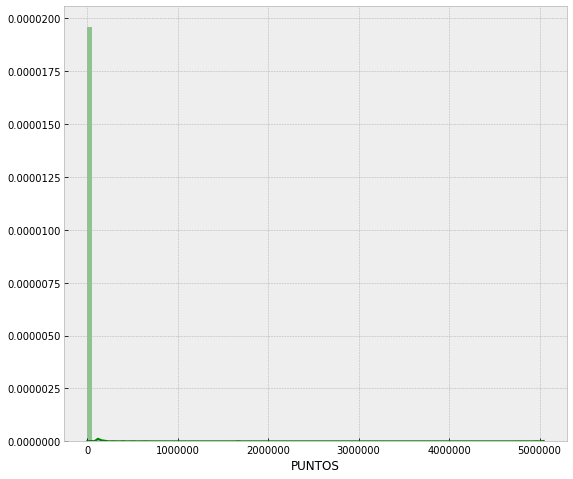

In [8]:
print(cargas['PUNTOS'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(cargas['PUNTOS'], color='g', bins=100, hist_kws={'alpha': 0.4});

from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()

In [9]:
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    cargas['PUNTOS'].plot(ax=ax)
    ax.set_ylim(0, 15000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

In [10]:
cargas_desc  = cargas.groupby('PUNTOS')

In [11]:
for descripcion, data_d in cargas_desc:
    
    suma_p=data_d['ACTIVIDAD'].count()
    print("puntos",descripcion)
    print("",suma_p)

puntos 0
 1417
puntos 1
 2
puntos 2
 1
puntos 4
 1
puntos 7
 1
puntos 10
 424
puntos 11
 1
puntos 20
 28
puntos 30
 8
puntos 40
 5
puntos 41
 1
puntos 50
 6
puntos 60
 1
puntos 70
 1
puntos 80
 1
puntos 101
 1
puntos 120
 1
puntos 150
 31
puntos 200
 932
puntos 210
 6
puntos 230
 1
puntos 300
 38
puntos 350
 22
puntos 400
 50
puntos 420
 1
puntos 450
 1
puntos 500
 70
puntos 550
 1
puntos 600
 15
puntos 650
 1
puntos 700
 4
puntos 750
 1
puntos 800
 23
puntos 810
 1
puntos 1000
 94
puntos 1050
 1
puntos 1100
 1
puntos 1200
 10
puntos 1250
 1
puntos 1300
 1
puntos 1350
 1
puntos 1390
 1
puntos 1400
 6
puntos 1410
 1
puntos 1500
 1
puntos 1550
 1
puntos 1600
 5
puntos 1700
 1
puntos 2000
 1
puntos 2100
 2
puntos 2200
 1
puntos 2400
 2
puntos 2600
 2
puntos 3000
 16
puntos 3030
 1
puntos 3200
 1
puntos 3310
 1
puntos 3350
 1
puntos 3400
 2
puntos 3600
 1
puntos 4750
 2
puntos 5000
 83
puntos 5200
 3
puntos 5300
 1
puntos 5400
 1
puntos 5800
 1
puntos 6000
 1
puntos 6720
 1
puntos 6900
 1


In [12]:
cargas['PARTICIPACIONES'].sum()

5743

In [13]:
cargas['PUNTOS'].sum()

20096809

In [14]:
cross= pd.crosstab(cargas.PUNTOS.sum(), [cargas.PARTICIPACIONES], margins=True)


In [15]:
cross

PARTICIPACIONES,1,2,3,4,5,6,7,8,9,10,...,27,29,31,36,38,67,78,84,102,All
row_0,,,,,,,,,,,,,,,,,,,,,
20096809,3211,243,69,28,26,18,11,10,4,5,...,1,2,1,1,1,2,1,1,1,3675
All,3211,243,69,28,26,18,11,10,4,5,...,1,2,1,1,1,2,1,1,1,3675


In [16]:
cross_2= pd.crosstab(cargas.PARTICIPACIONES.sum(), [cargas.PUNTOS], margins=True)
cross_2
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    cross_2.plot(ax=ax)
    ax.set_ylim(0, 15000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

In [17]:
cross.to_excel("puntos.xlsx", sheet_name="jumex" )
cross_2.to_excel("participaciones_2.xlsx", sheet_name="jumex" )

In [18]:
rango=0
sumatot=0
for descripcion, data_d in cargas_desc:
    if rango < 5 :
        suma_p=data_d['ACTIVIDAD'].count()
        #print("puntos",descripcion)
        #print("",suma_p)
        sumatot= sumatot +suma_p
        rango =rango +1
    else:
        
        print("puntos",descripcion)
        print("sumatot= ",sumatot)
        sumatot=0
        rango=0
print("sumatot= ",sumatot)

puntos 10
sumatot=  1422
puntos 50
sumatot=  43
puntos 150
sumatot=  5
puntos 400
sumatot=  999
puntos 650
sumatot=  88
puntos 1050
sumatot=  123
puntos 1390
sumatot=  14
puntos 1700
sumatot=  14
puntos 3000
sumatot=  8
puntos 3600
sumatot=  6
puntos 5800
sumatot=  90
puntos 7700
sumatot=  5
puntos 14000
sumatot=  5
puntos 24000
sumatot=  203
puntos 26000
sumatot=  32
puntos 28000
sumatot=  5
puntos 41000
sumatot=  24
puntos 51800
sumatot=  7
puntos 60460
sumatot=  6
puntos 120000
sumatot=  5
puntos 165000
sumatot=  9
puntos 500000
sumatot=  5
sumatot=  4


In [19]:
cargas.describe().to_excel("DESCRIBE.xlsx", sheet_name="jumex" )

In [20]:
cargas[['PARTICIPACIONES','PUNTOS']]


,PARTICIPACIONES,PUNTOS
0,1,0
1,1,0
2,1,0
3,1,10
4,1,200
...,...,...
3670,1,10
3671,1,0
3672,1,10
3673,1,200


In [21]:
#df_cargas=cargas['PARTICIPACIONES','PUNTOS']
#cargas.pivot(index='PARTICIPACIONES',columns='PUNTOS'
cross.pivot(cargas.PARTICIPACIONES,cargas.PUNTOS.sum())

KeyError: 'None of [20096809] are in the columns'

In [22]:
gpart= cargas.groupby('PARTICIPACIONES')
gpart.size()

PARTICIPACIONES
1      3211
2       243
3        69
4        28
5        26
6        18
7        11
8        10
9         4
10        5
11        3
12        5
13        2
14        3
15        4
16        2
17        2
18        7
19        3
22        3
23        2
24        1
26        2
27        1
29        2
31        1
36        1
38        1
67        2
78        1
84        1
102       1
dtype: int64

In [23]:
gpart.count()

,NOMBRE,PERFIL,ACTIVIDAD,PUNTOS,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
PARTICIPACIONES,,,,,,,,,,
1,3211,3211,3211,3211,0,0,0,0,2809,2808
2,243,243,243,243,0,0,0,0,209,209
3,69,69,69,69,0,0,0,0,59,59
4,28,28,28,28,0,0,0,0,24,24
5,26,26,26,26,0,0,0,0,24,24
6,18,18,18,18,0,0,0,0,16,16
7,11,11,11,11,0,0,0,0,11,11
8,10,10,10,10,0,0,0,0,8,8
9,4,4,4,4,0,0,0,0,4,4


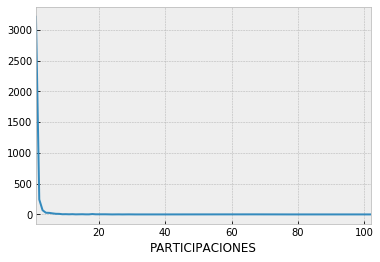

In [24]:
%matplotlib inline
gpart.size().plot()

In [25]:
gpts= cargas.groupby('PUNTOS')
gpts.size()

PUNTOS
0          1417
1             2
2             1
4             1
7             1
           ... 
500000        1
620000        1
1095000       1
1659000       1
5045000       1
Length: 136, dtype: int64

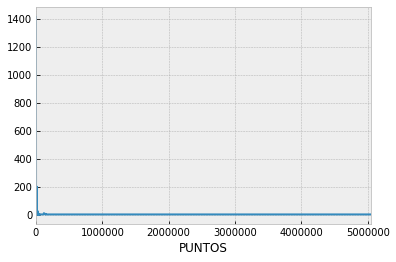

In [26]:
gpts.size().plot()